In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib import cm
import glob
colors = plt.cm.tab10.colors
import os
import sys

In [2]:
path = '../Examples/ARPES/'

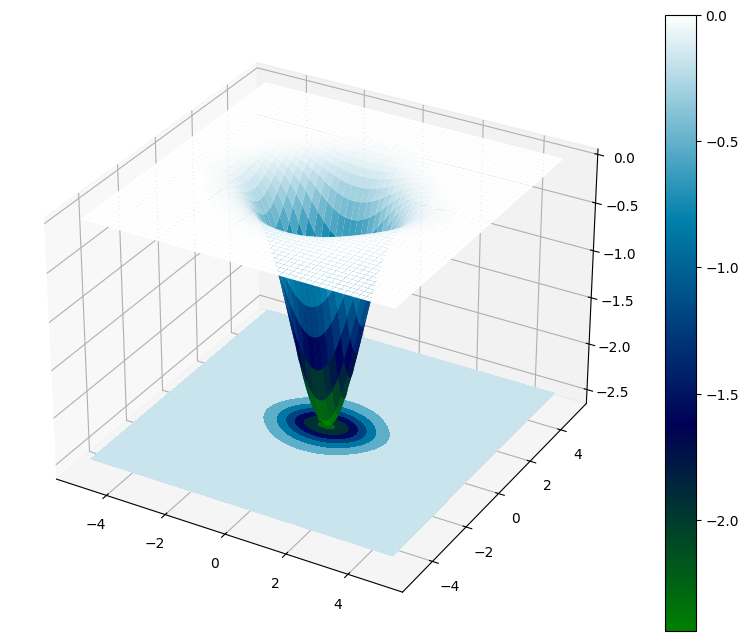

In [25]:
U0=0.78
aa=8.15
x0=0.565*1.88
y0=0

x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)

step = lambda x: 0.5 * (1 + np.sign(x))

Z = -U0 * (step(X + aa / 2) * (1 - step(X - aa / 2))) * (1 + np.tanh(X + x0)) * (1 + np.tanh(x0 - X)) * (1 + np.tanh(Y + y0)) * (1 + np.tanh(-Y + y0))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=cm.ocean)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z), cmap=cm.ocean)
fig.colorbar(surf)



In [47]:
import re

wavefunctions = {}

# List all files in the directory
for filename in os.listdir(os.path.join(path, 'static/')):
    if filename.startswith('wf'):
        k = int(filename.split('-')[1][1:])
        orb = int(filename.split('-')[2][2:-8])
        if filename.split('-')[2][7] == 'y':
            axis = 'x'
        else:
            axis = 'y'
        key = str(k) + '_' + str(orb) + '_' + axis
        wavefunctions[key] = np.loadtxt(os.path.join(path, 'static/', filename))


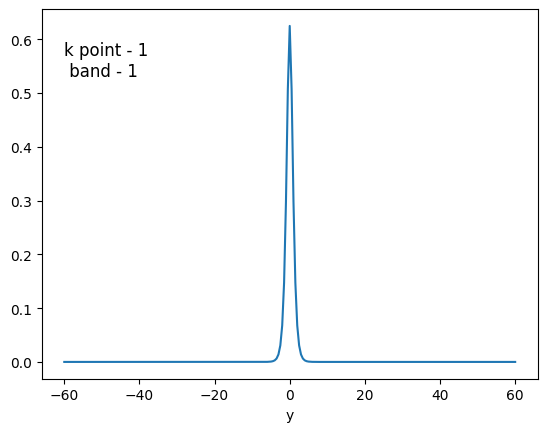

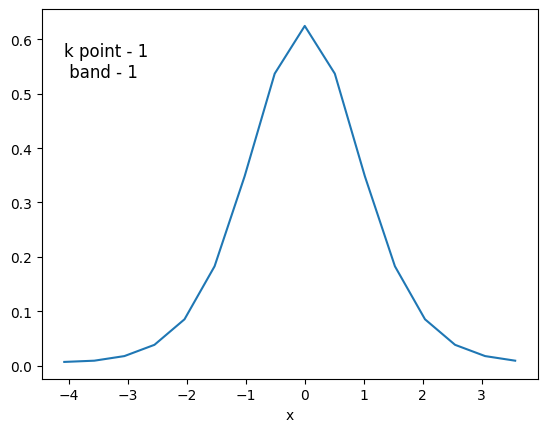

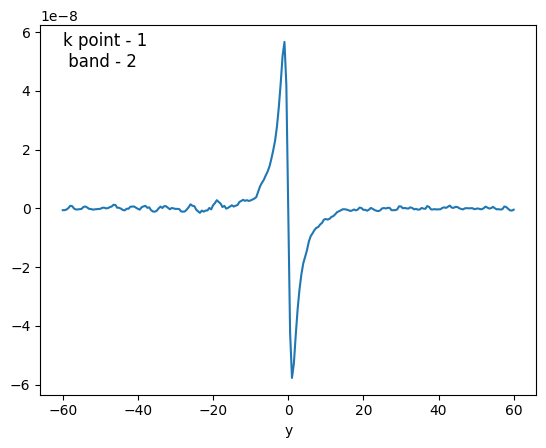

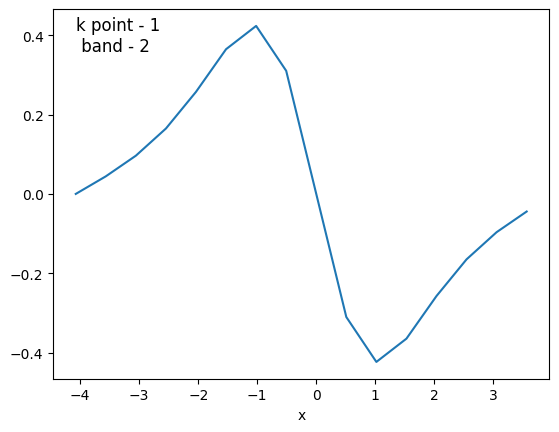

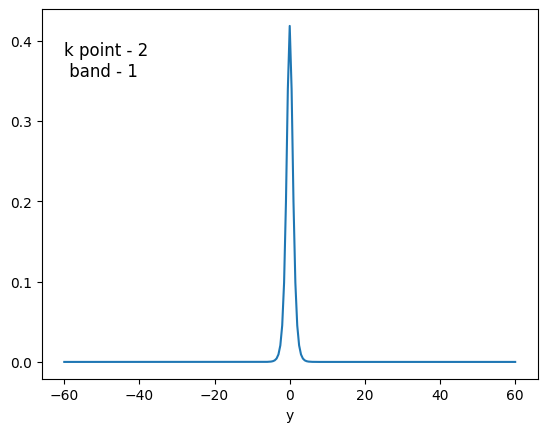

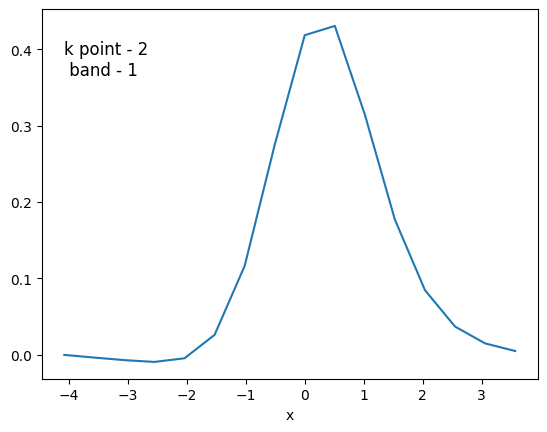

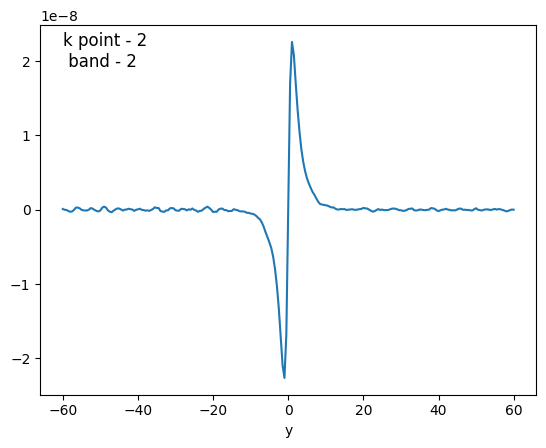

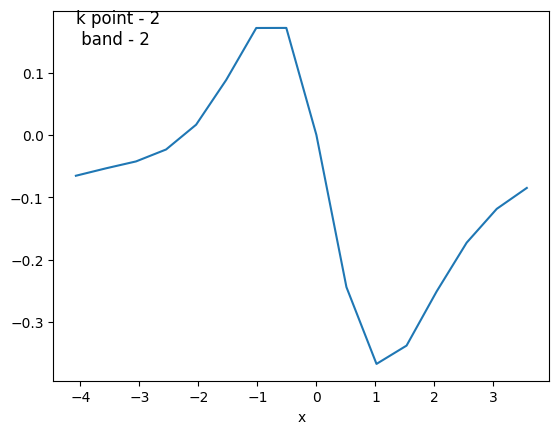

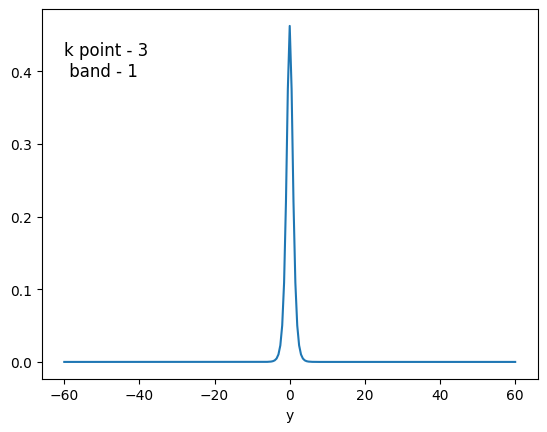

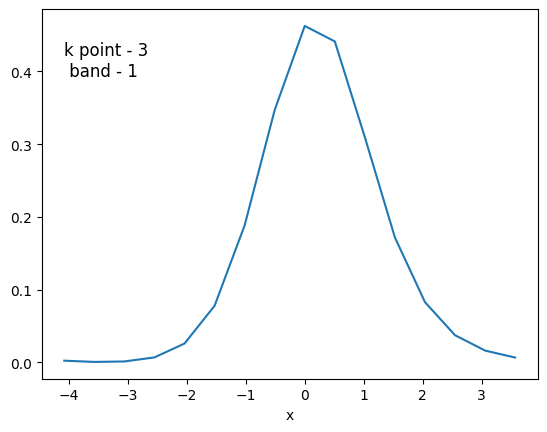

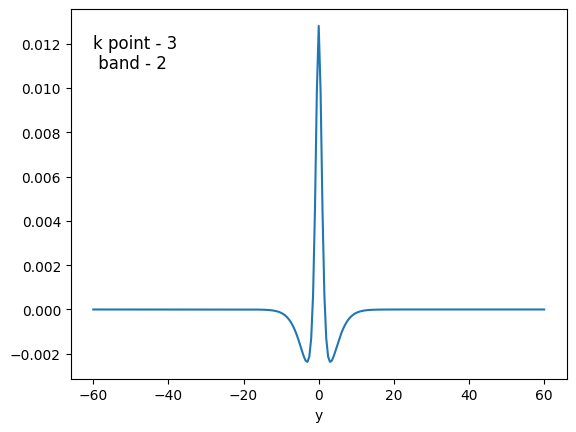

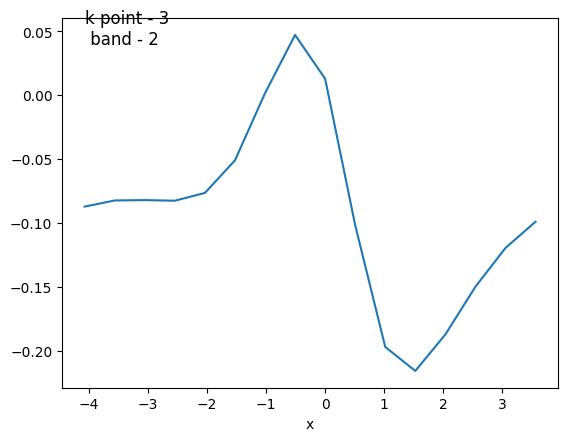

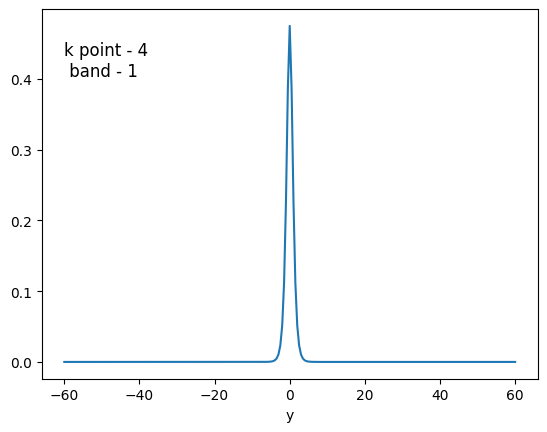

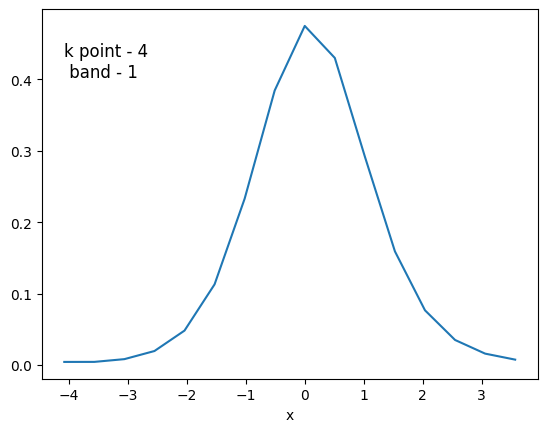

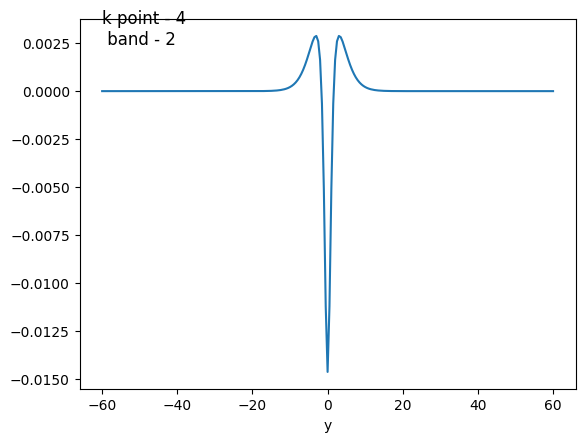

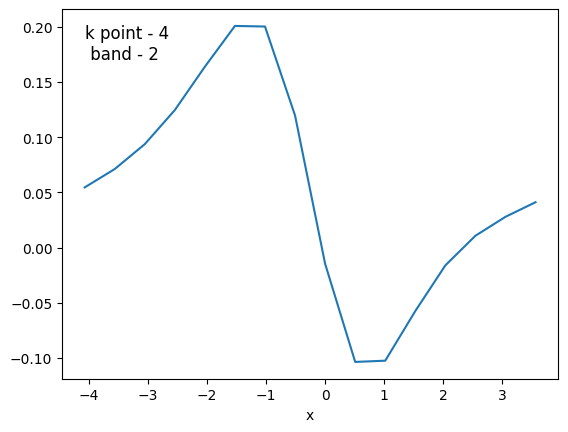

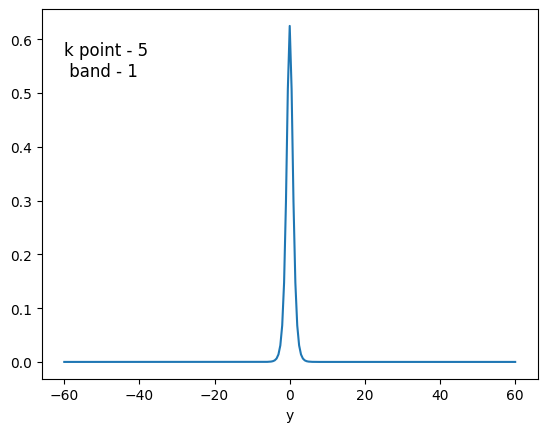

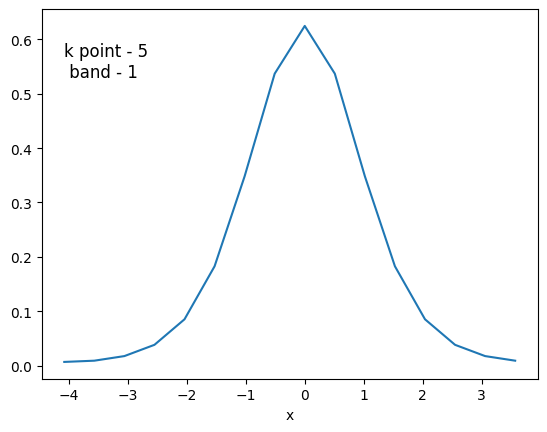

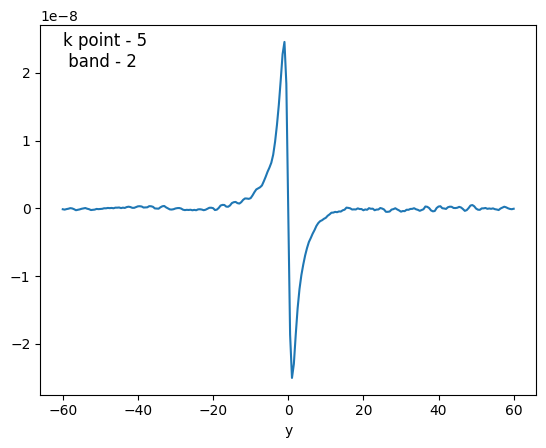

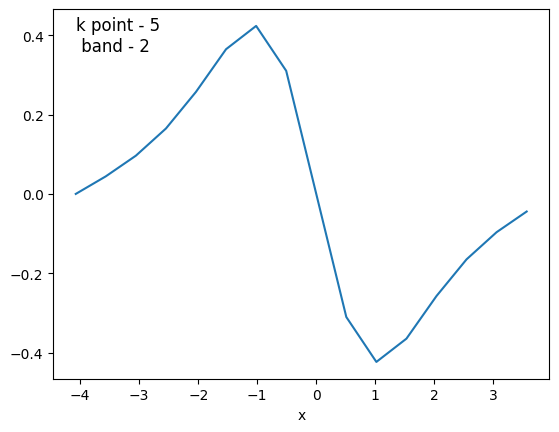

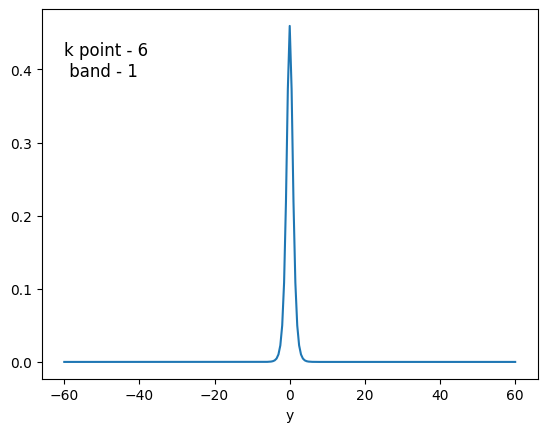

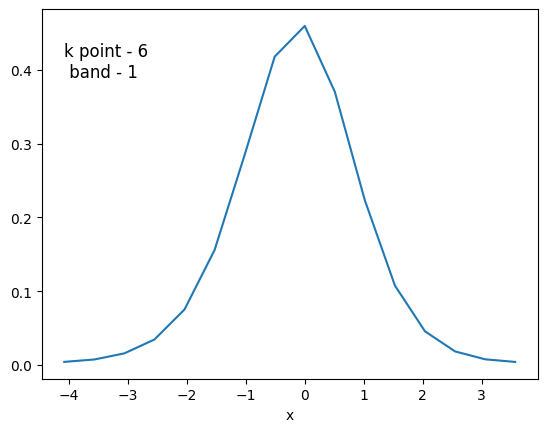

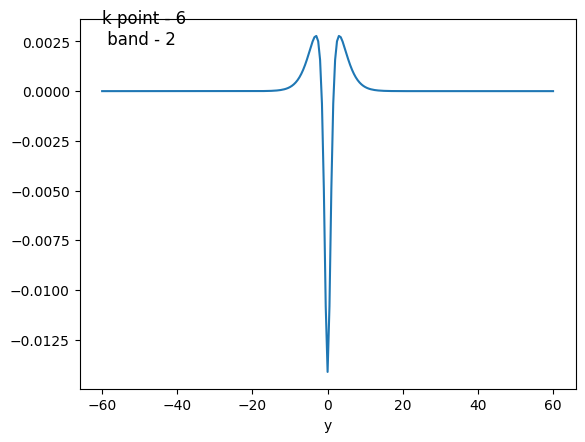

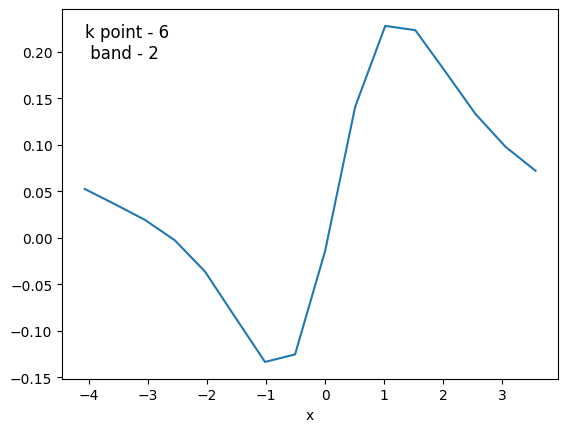

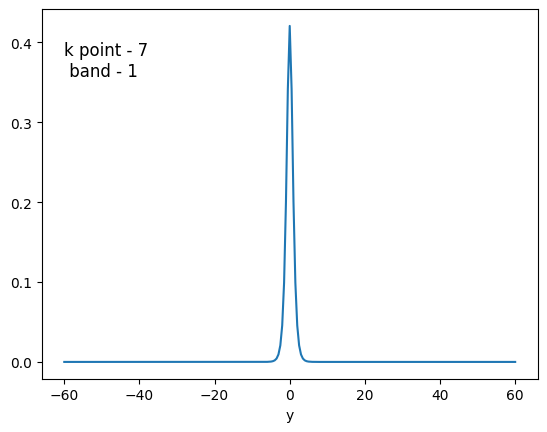

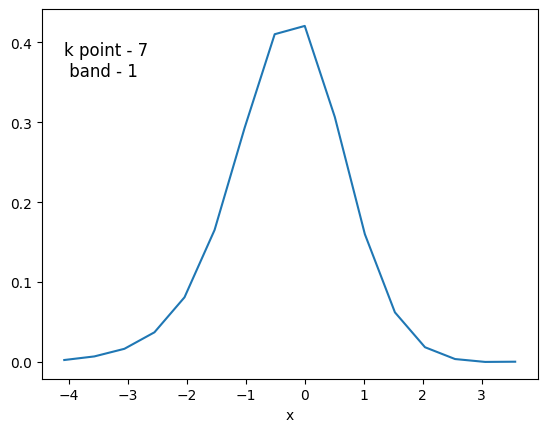

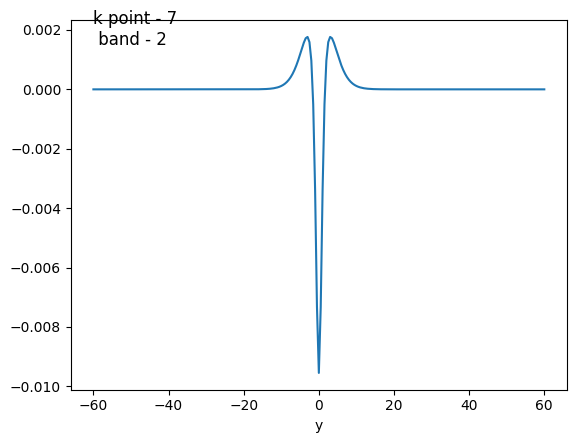

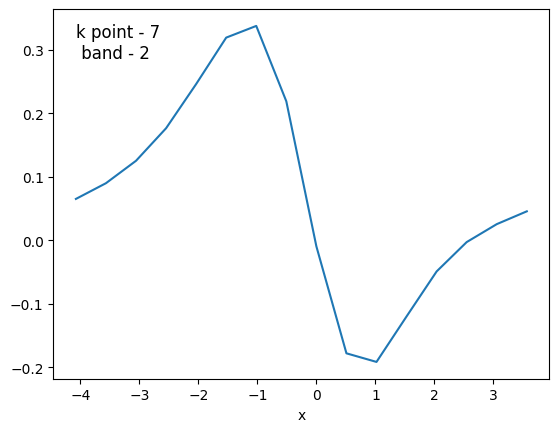

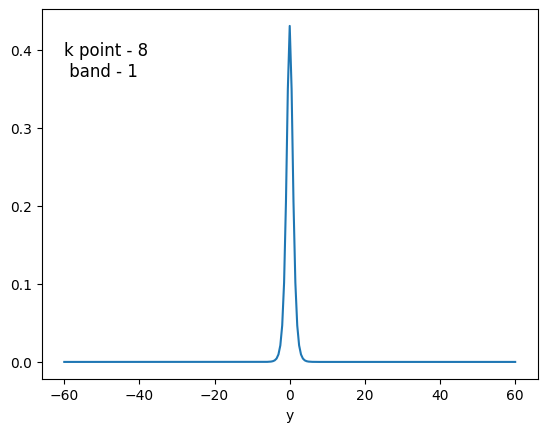

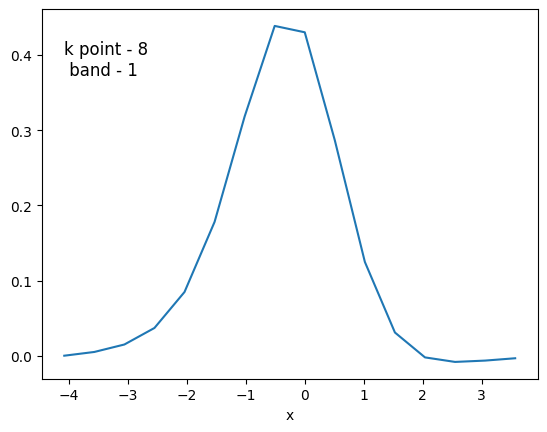

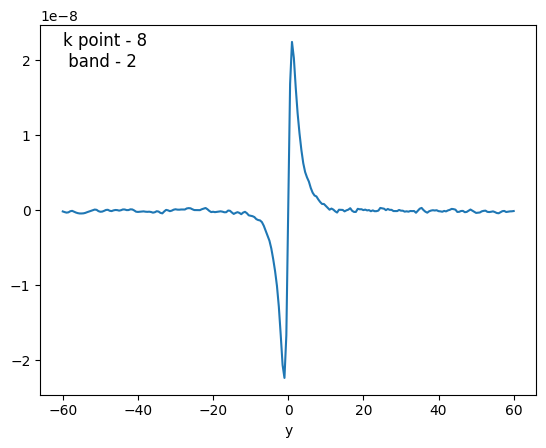

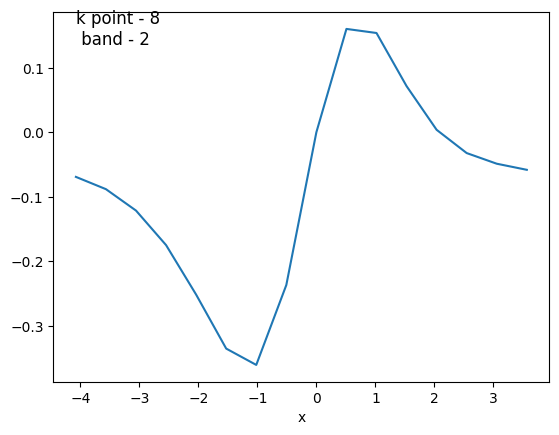

In [63]:
for key in wavefunctions.keys():
    plt.plot(wavefunctions[key][:,0],wavefunctions[key][:,1] ,)
    plt.text(wavefunctions[key][0,0],0.85*max(wavefunctions[key][:,1]), "k point - %s\n band - %s" %(key[0], key[2]), fontsize=12)
    plt.xlabel(key[-1])
    plt.show()

Text(0, 0.5, 'Energy (Ha)')

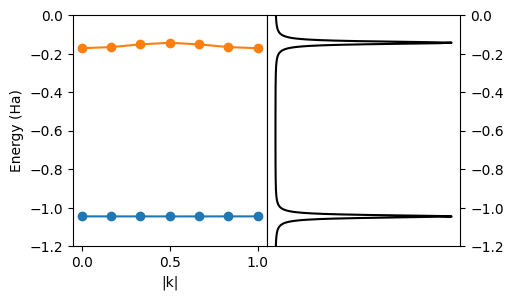

In [79]:
bands = np.loadtxt(os.path.join(path, 'static/bandstructure'))
dos = np.loadtxt(os.path.join(path, 'static/total-dos.dat'))
fig, axs = plt.subplots(1, 2, figsize=(5, 3))
fig.subplots_adjust(wspace=0.0)
axs[0].plot(bands[:,0], bands[:,3:], 'o-')
axs[1].plot(dos[:,1], dos[:,0], 'k')
axs[1].yaxis.tick_right()
axs[1].set_xticks([])
for ax in axs:
    ax.set_ylim(-1.2, -0)
    
axs[0].set_xlabel('|k|')
axs[0].set_ylabel('Energy (Ha)')

In [ ]:
density_files = sorted(glob.glob(os.path.join(path, 'output_iter/*/density.x=0,z=0')))
density_files = [file.replace('\\', '/') for file in density_files]

images = []
for file in density_files:
    img = np.loadtxt(file)
    images.append(img)



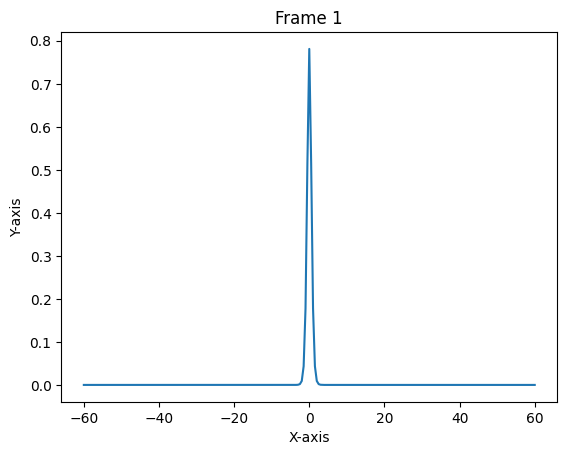

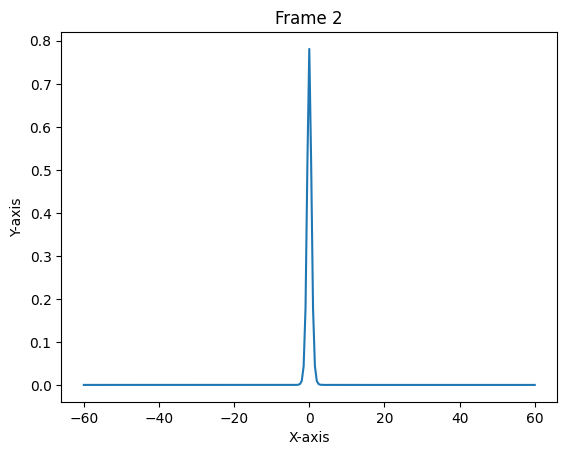

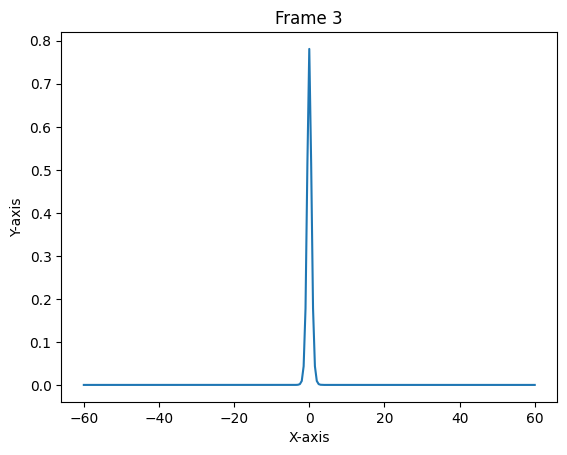

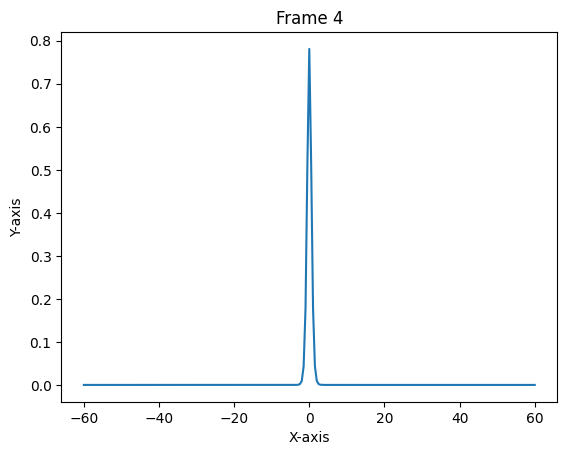

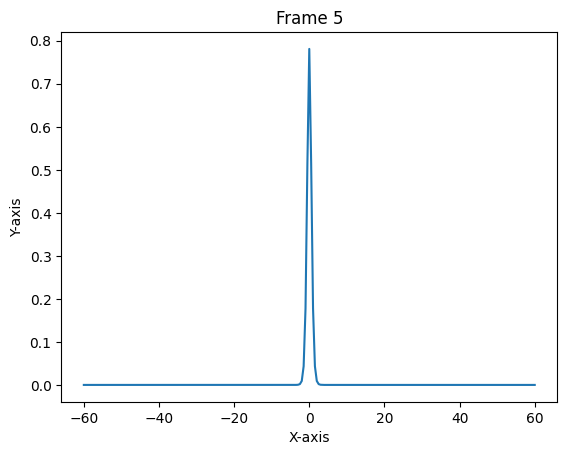

In [ ]:
for i, img in enumerate(images):
    plt.figure()
    plt.plot(img[:, 0], img[:, 1])
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Frame {i+1}')
    plt.show()


In [97]:
energy = np.loadtxt(os.path.join(path, 'td.general/energy'))
laser = np.loadtxt(os.path.join(path, 'td.general/laser'))

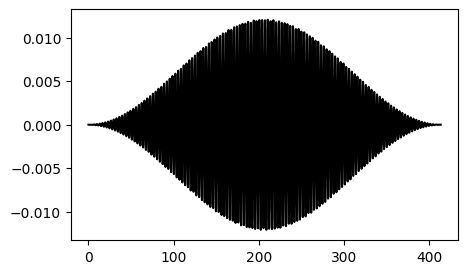

In [114]:
fig, axs = plt.subplots(1, 1, figsize=(5, 3), sharex=True)
axs.plot(laser[:,1], laser[:,2], 'k')

In [131]:
d1 = np.loadtxt(os.path.join(path, 'PES_ARPES.path'))
x = sorted(set(d1[:,0]))
y = sorted(set(d1[:,3]))
Map = np.zeros((len(x), len(y)))

for i, item in enumerate(d1):
    Map[x.index(item[0]), y.index(item[3])] = item[4]

Text(0.5, 0, 'Energy (eV)')

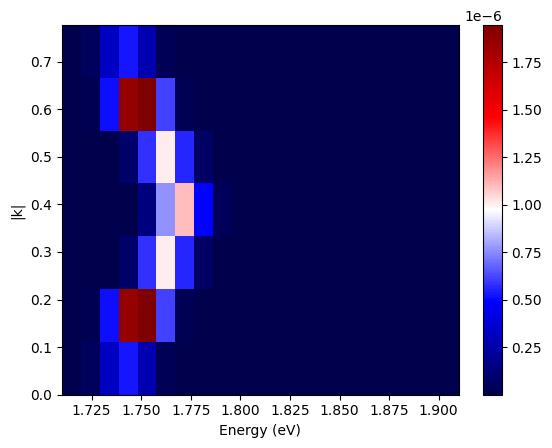

In [135]:
plt.imshow(Map, cmap='seismic', 
           extent=[min(y), max(y), min(x), max(x)], 
           aspect='auto')
plt.colorbar()
plt.ylabel('|k|')
plt.xlabel('Energy (eV)')